### Visualisasi Kebutuhan Nutrisi Harian Dan Rekomendasi Makanan Berdasarkan Kebutuhan Nutrisi
By: Marco Sutisna Putra - ID:20924001

### Import module

In [35]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd


### Load data

In [2]:
df2 = pd.read_csv('D:\\S2\\Smt 1\\Metodologi Penelitian\\database\\Data BMR.csv')

df2

,Jenis Kelamin Pengisi Survey,Usia Pengisi Survey (Dalam Angka),Berat Badan Pengisi Survey (Dalam KG),Tinggi Badan Pengisi Survey (Dalam CM),Faktor Aktivitas
0,Pria,29,75.0,172,1.200
1,Pria,26,65.8,170,1.375
2,Wanita,28,60.0,155,1.200
3,Wanita,24,42.0,153,1.200
4,Wanita,28,50.0,162,1.375
5,Wanita,20,45.0,160,1.200
6,Pria,25,125.0,177,1.200
7,Wanita,23,48.0,155,1.375
8,Wanita,28,39.0,155,1.200
9,Wanita,27,75.0,162,1.375


In [3]:
'''
import random
def factor_activity(n):
  numbers = []
  for _ in range(n):
    numbers.append(random.choice([1.2, 1.375, 1.55, 1.725]))
  return numbers

'''

def calculate_bmr(row):
  gender = row['Jenis Kelamin Pengisi Survey']
  age = row['Usia Pengisi Survey (Dalam Angka)']
  weight = row['Berat Badan Pengisi Survey (Dalam KG)']
  height = row['Tinggi Badan Pengisi Survey (Dalam CM)']
  activity_factor = row['Faktor Aktivitas']

  if gender == 'Pria':
    bmr = 66 + (13.7 * weight) + (5.0 * height) - (6.78 * age)
  elif gender == 'Wanita':
    bmr = 665 + (9.6 * weight) + (1.8 * height) - (4.7 * age)

  # Apply activity factor to get daily caloric needs
  daily_calories = bmr * activity_factor

  return f'{daily_calories:0.2f}'


'''
n = 100
data = {'usia': np.random.randint(15,60,n),
        'berat badan' : np.random.uniform(40,100,n),
        'tinggi badan' : np.random.uniform(140, 190, n),
        'factor activity ' : factor_activity(n)}

#df2 = pd.DataFrame(data)
'''

df2['bmr'] = df2.apply(calculate_bmr, axis=1) 


df2

,Jenis Kelamin Pengisi Survey,Usia Pengisi Survey (Dalam Angka),Berat Badan Pengisi Survey (Dalam KG),Tinggi Badan Pengisi Survey (Dalam CM),Faktor Aktivitas,bmr
0,Pria,29,75.0,172,1.200,2108.26
1,Pria,26,65.8,170,1.375,2256.62
2,Wanita,28,60.0,155,1.200,1666.08
3,Wanita,24,42.0,153,1.200,1476.96
4,Wanita,28,50.0,162,1.375,1794.38
5,Wanita,20,45.0,160,1.200,1549.20
6,Pria,25,125.0,177,1.200,2992.80
7,Wanita,23,48.0,155,1.375,1782.96
8,Wanita,28,39.0,155,1.200,1424.16
9,Wanita,27,75.0,162,1.375,2130.84


Hitung Ratio Karbo, Protein, Lemak

Karbohidrat: 45-65% dari total kalori. (dibagi 4)

Protein: 10-35% dari total kalori. (dibagi 4)

Lemak: 20-35% dari total kalori. (dibagi 9)

Jika Anda membutuhkan 2000 kalori per hari, maka:

Karbohidrat: 2000 kalori x 0.45 = 900 kalori (900 kalori / 4 kalori/gram = 225 gram karbohidrat)

Protein: 2000 kalori x 0.25 = 500 kalori (500 kalori / 4 kalori/gram = 125 gram protein)

Lemak: 2000 kalori x 0.3 = 600 kalori (600 kalori / 9 kalori/gram = 67 gram lemak)

In [4]:
df2['bmr'] = pd.to_numeric(df2['bmr'], errors='coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Jenis Kelamin Pengisi Survey            10 non-null     object 
 1   Usia Pengisi Survey (Dalam Angka)       10 non-null     int64  
 2   Berat Badan Pengisi Survey (Dalam KG)   10 non-null     float64
 3   Tinggi Badan Pengisi Survey (Dalam CM)  10 non-null     int64  
 4   Faktor Aktivitas                        10 non-null     float64
 5   bmr                                     10 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 612.0+ bytes


In [5]:
def karbo(row):
    bmr = row['bmr']
    karb_min = (bmr*0.65)/4
    return f'{karb_min:0.2f}'

def protein(row):
    bmr = row['bmr']
    prot_min = (bmr*0.35)/4
    return f'{prot_min:0.2f}'

def lemak(row):
    bmr = row['bmr']
    lem_min = (bmr*0.35)/9
    return f'{lem_min:0.2f}'

df2['karbo_minimum'] = df2.apply(karbo, axis=1)
df2['protein_minimum'] = df2.apply(protein, axis=1)
df2['lemak_minimum'] = df2.apply(lemak, axis=1)

df2

,Jenis Kelamin Pengisi Survey,Usia Pengisi Survey (Dalam Angka),Berat Badan Pengisi Survey (Dalam KG),Tinggi Badan Pengisi Survey (Dalam CM),Faktor Aktivitas,bmr,karbo_minimum,protein_minimum,lemak_minimum
0,Pria,29,75.0,172,1.200,2108.26,342.59,184.47,81.99
1,Pria,26,65.8,170,1.375,2256.62,366.70,197.45,87.76
2,Wanita,28,60.0,155,1.200,1666.08,270.74,145.78,64.79
3,Wanita,24,42.0,153,1.200,1476.96,240.01,129.23,57.44
4,Wanita,28,50.0,162,1.375,1794.38,291.59,157.01,69.78
5,Wanita,20,45.0,160,1.200,1549.20,251.75,135.56,60.25
6,Pria,25,125.0,177,1.200,2992.80,486.33,261.87,116.39
7,Wanita,23,48.0,155,1.375,1782.96,289.73,156.01,69.34
8,Wanita,28,39.0,155,1.200,1424.16,231.43,124.61,55.38
9,Wanita,27,75.0,162,1.375,2130.84,346.26,186.45,82.87


In [6]:
df = pd.read_csv('D:\\S2\\Smt 1\\Metodologi Penelitian\\database\\basis data new.csv')

In [7]:
df.head(15)

,No,Nama_Makanan,Jenis_makanan,Size,Kalori,Lemak,Karbohidrat,Protein
0,1,Indomie goreng,Makanan,80.0,350.0,12.0,52.0,8.0
1,2,Pop Mie,Makanan,75.0,350.0,16.0,45.0,6.0
2,3,Chitato Lite,Snack,14.0,80.0,4.5,8.0,1.0
3,4,Bubur Ayam,Makanan,240.0,372.0,12.4,36.1,27.6
4,5,Nissin Crispy Crackers,Snack,30.0,150.0,6.0,21.0,2.0
5,6,Pringles,Snack,25.0,130.0,8.0,14.0,2.0
6,7,Kupat Tahu,Makanan,250.0,391.0,10.9,62.7,11.3
7,8,BengBeng,Snack,20.0,100.0,5.0,13.0,1.0
8,9,Tango,Snack,19.0,90.0,4.0,12.0,1.0
9,10,Silver Queen,Snack,30.0,170.0,11.0,14.0,4.0


In [8]:
df.head()

,No,Nama_Makanan,Jenis_makanan,Size,Kalori,Lemak,Karbohidrat,Protein
0,1,Indomie goreng,Makanan,80.0,350.0,12.0,52.0,8.0
1,2,Pop Mie,Makanan,75.0,350.0,16.0,45.0,6.0
2,3,Chitato Lite,Snack,14.0,80.0,4.5,8.0,1.0
3,4,Bubur Ayam,Makanan,240.0,372.0,12.4,36.1,27.6
4,5,Nissin Crispy Crackers,Snack,30.0,150.0,6.0,21.0,2.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             37 non-null     int64  
 1   Nama_Makanan   37 non-null     object 
 2   Jenis_makanan  37 non-null     object 
 3   Size           37 non-null     float64
 4   Kalori         37 non-null     float64
 5   Lemak          37 non-null     float64
 6   Karbohidrat    37 non-null     float64
 7   Protein        37 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.4+ KB


In [10]:
jenis_makanan = df['Jenis_makanan'].value_counts()
print(jenis_makanan)

Jenis_makanan
Snack      26
Makanan     6
Minuman     5
Name: count, dtype: int64


### Visualisasi

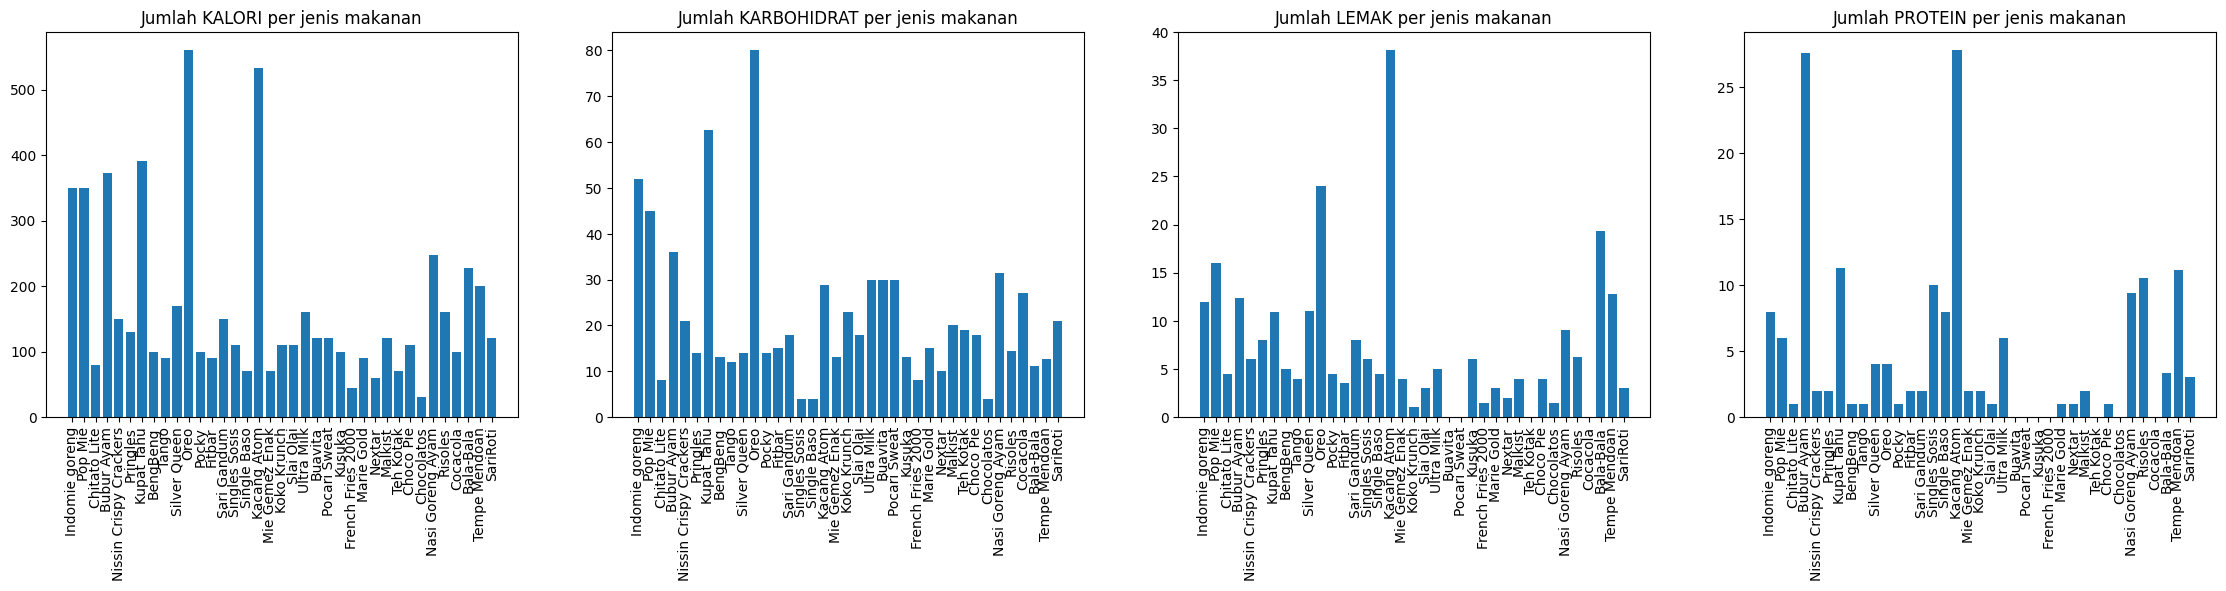

In [11]:
y = df['Kalori']
y1 = df['Karbohidrat']
y2 = df['Lemak']
y3 = df['Protein']
x = df['Nama_Makanan']

plt.figure(figsize=(28,5))

plt.subplot(1, 4, 1)  # 1 baris, 4 kolom, subplot ke-1
plt.bar(x,y)
plt.title("Jumlah KALORI per jenis makanan")
plt.xticks(rotation=90)

plt.subplot(1, 4, 2) 
plt.bar(x,y1)
plt.title("Jumlah KARBOHIDRAT per jenis makanan")
plt.xticks(rotation=90)



plt.subplot(1, 4, 3) 
plt.bar(x,y2)
plt.title("Jumlah LEMAK per jenis makanan")
plt.xticks(rotation=90)

plt.subplot(1, 4, 4) 
plt.bar(x,y3)
plt.title("Jumlah PROTEIN per jenis makanan")
plt.xticks(rotation=90)

plt.show()

In [12]:
x = df.columns[4] #kalori
x1 = df.columns[6] #karbo
x2 = df.columns[7] #prot
x3 = df.columns[5] #lemak


### Pengujian

In [14]:
#Search kata

kalori = []
hasil = []
nama_makanan = input("Masukan nama makanan yang kamu makan:")
hasil_pencarian = df[df['Nama_Makanan'].str.contains(nama_makanan, case=False)]
k = hasil_pencarian['Kalori'].astype(float)
kalori.append(k)
hasil.append(hasil_pencarian['Nama_Makanan'].values)

nama_makanan1 = input("Masukan nama makanan yang kamu makan:")
hasil_pencarian = df[df['Nama_Makanan'].str.contains(nama_makanan1, case=False)]
k1 = hasil_pencarian['Kalori'].astype(float)
kalori.append(k1)
hasil.append(hasil_pencarian['Nama_Makanan'].values)


#jumlahkan kalori yang sudah dimasukan
print("makanan yang makan", hasil)
print("jumlah kalori terkumpul", np.sum(kalori))



makanan yang makan [array(['Nasi Goreng Ayam Baso'], dtype=object), array(['Nasi Goreng Ayam Baso'], dtype=object)]
jumlah kalori terkumpul 494.0


In [13]:
jumlah=int(input("jumlah makanan yang mau dimakan"))
hari = input("Masukkan hari apa kamu makan?")
tanggal = int(input("Tanggal berapa?"))
bulan = int(input('Bulan apa?'))
tahun= int(input('Tahun berapa?'))
waktu_makan = input("Sarapan/Makan Siang/Makan Malam")

makanan=set()
kal = []
prot = []
karb = []
lem = []

for _ in range(jumlah): 
    nama = input("masukan nama makanan")
    nama_makanan = df[df['Nama_Makanan'].str.contains(nama, case=False)]
    makanan.add(nama) #memasukan ke set
    kal.extend(nama_makanan['Kalori'].tolist()) #sama kaya append
    prot.extend(nama_makanan['Protein'].tolist())
    karb.extend(nama_makanan['Karbohidrat'].tolist())
    lem.extend(nama_makanan['Lemak'].tolist())

# Hitung total kalori setelah semua iterasi
total_kalori = np.sum(kal)
total_protein = np.sum(prot)
total_karbo = np.sum(karb)
total_lemak = np.sum(lem)

#masukan data ke dataframe Daily

#ambil data kolom bmr
df2['bmr'] = df2['bmr'].astype(float)
hasil = df2.loc[0,'bmr']
bmr = hasil

#ambil data kolom karbo minimum
df2['karbo_minimum'] = df2['karbo_minimum'].astype(float)
km = df2.loc[0,'karbo_minimum']
karb_min = km

#ambil data kolom protein minimum
df2['protein_minimum'] = df2['protein_minimum'].astype(float)
pm = df2.loc[0,'protein_minimum']
prot_min = pm

#ambil data kolom lemak minimum
df2['lemak_minimum'] = df2['lemak_minimum'].astype(float)
lm = df2.loc[0,'lemak_minimum']
lem_min = lm

#menghitung %
percent_bmr = (total_kalori/bmr)*100
percent_karb = (total_karbo/karb_min)*100
percent_prot = (total_protein/prot_min)*100
percent_lem =(total_lemak/lem_min)*100

print("Date: ", hari, ", ",tanggal,"/",bulan,"/",tahun)
print("Waktu Makan: ", waktu_makan)
print("Makanan yang dimakan", makanan)
print("Jumlah kalori terkumpul:", f"{total_kalori:.2f}", "kalori (",f"{percent_bmr:.2f}","% dari kebutuhan tubuh)")
print("Jumlah protein terkumpul:", f"{total_protein:.2f}","gram (",f"{percent_prot:.2f}","% dari kebutuhan tubuh)")
print("Jumlah karbohidrat terkumpul:", f"{total_karbo:.2f}","gram (",f"{percent_karb:.2f}","% dari kebutuhan tubuh)")
print("Jumlah lemak terkumpul:", f"{total_lemak:.2f}","gram (",f"{percent_lem:.2f}","% dari kebutuhan tubuh)")



Date:  Senin ,  16 / 12 / 2024
Waktu Makan:  Makan Malam
Makanan yang dimakan {'Pocari', 'Nasi Goreng', 'Nextar'}
Jumlah kalori terkumpul: 427.00 kalori ( 20.25 % dari kebutuhan tubuh)
Jumlah protein terkumpul: 10.37 gram ( 5.62 % dari kebutuhan tubuh)
Jumlah karbohidrat terkumpul: 71.47 gram ( 20.86 % dari kebutuhan tubuh)
Jumlah lemak terkumpul: 11.00 gram ( 13.42 % dari kebutuhan tubuh)


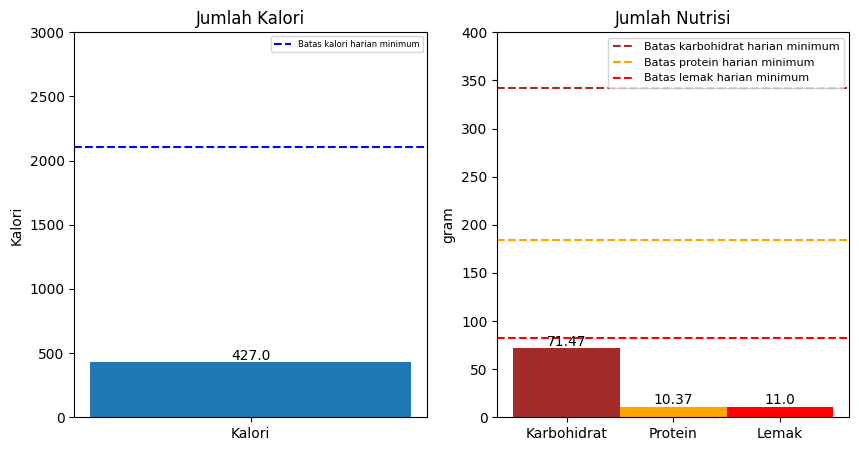

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(x,total_kalori, width=0.1)
plt.title("Jumlah Kalori")
plt.ylim(0,3000)
plt.axhline(y=bmr, color='blue', linestyle='--', label='Batas kalori harian minimum')
plt.legend(fontsize=6)
plt.text(x,total_kalori, total_kalori, ha='center', va='bottom')
plt.ylabel('Kalori')

plt.subplot(1,2,2)
plt.bar(x1,total_karbo, width=1,  color='brown')
plt.text(x1,total_karbo, f"{total_karbo:.2f}", ha='center', va='bottom')
plt.bar(x2,total_protein, width=1, color='orange')
plt.text(x2,total_protein, f"{total_protein:.2f}", ha='center', va='bottom')
plt.bar(x3,total_lemak, width = 1, color='red')
plt.text(x3,total_lemak, total_lemak, ha='center', va='bottom')

req_nutrisi = int(input("Masukan batas nutrisi yang ingin dilihat(karbohidrat=1, protein=2, lemak=3, semua = 4)"))
if req_nutrisi == 1:
    plt.axhline(y=karb_min, color='brown', linestyle='--', label='Batas karbohidrat harian minimum')
elif req_nutrisi ==2:
    plt.axhline(y=prot_min, color='orange', linestyle='--', label='Batas protein harian minimum')
elif req_nutrisi == 3:
    plt.axhline(y=lem_min, color='red', linestyle='--', label='Batas lemak harian minimum')
elif req_nutrisi == 4:
    plt.axhline(y=karb_min, color='brown', linestyle='--', label='Batas karbohidrat harian minimum')
    plt.axhline(y=prot_min, color='orange', linestyle='--', label='Batas protein harian minimum')
    plt.axhline(y=lem_min, color='red', linestyle='--', label='Batas lemak harian minimum')



plt.title("Jumlah Nutrisi")
plt.ylim(0,400)
plt.legend(fontsize=8)
plt.ylabel("gram")



plt.show()

### Data untuk visualisasi harian

In [16]:
Daily = pd.read_csv('D:\\S2\\Smt 1\\Metodologi Penelitian\\database\\Daily.csv')

Daily

,Hari,Tanggal,Bulan,Tahun,Waktu Makan,Kalori,Karbohidrat,Protein,Lemak
0,Senin,2,12,2024,Sarapan,90.0,3.5,15.0,2.0
1,Senin,2,12,2024,Makan Siang,650.0,52.0,8.0,12.0
2,Senin,2,12,2024,Makan Siang,1000.0,150.0,250.0,50.0
3,Senin,2,12,2024,Makan Malam,500.0,65.0,90.0,40.0
4,Senin,2,12,2024,Makan Malam,70.0,32.0,10.0,15.0
5,Selasa,3,12,2024,Sarapan,200.0,60.0,35.0,44.0
6,Selasa,3,12,2024,Makan Siang,90.0,10.0,10.0,25.0
7,Selasa,3,12,2024,Makan Malam,120.0,36.5,20.0,20.0
8,Rabu,4,12,2024,Sarapan,900.0,65.0,44.0,100.0
9,Rabu,4,12,2024,Makan Siang,1500.0,56.0,110.0,150.0


In [17]:
Daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hari         27 non-null     object 
 1   Tanggal      27 non-null     int64  
 2   Bulan        27 non-null     int64  
 3   Tahun        27 non-null     int64  
 4   Waktu Makan  27 non-null     object 
 5   Kalori       27 non-null     float64
 6   Karbohidrat  27 non-null     float64
 7   Protein      27 non-null     float64
 8   Lemak        27 non-null     float64
dtypes: float64(4), int64(3), object(2)
memory usage: 2.0+ KB


Import New Data to Dataframe Daily

In [18]:
new_row = {
    'Hari': hari,
    'Tanggal': tanggal,
    'Bulan': bulan,
    'Tahun': tahun,
    'Waktu Makan': waktu_makan,
    'Kalori': total_kalori,
    'Karbohidrat': total_karbo,
    'Protein': total_protein,
    'Lemak': total_lemak
}

Daily.loc[len(Daily)] = new_row

In [34]:
Daily.head(7)

,Hari,Tanggal,Bulan,Tahun,Waktu Makan,Kalori,Karbohidrat,Protein,Lemak
0,Senin,2,12,2024,Sarapan,90.0,3.5,15.0,2.0
1,Senin,2,12,2024,Makan Siang,650.0,52.0,8.0,12.0
2,Senin,2,12,2024,Makan Siang,1000.0,150.0,250.0,50.0
3,Senin,2,12,2024,Makan Malam,500.0,65.0,90.0,40.0
4,Senin,2,12,2024,Makan Malam,70.0,32.0,10.0,15.0
5,Selasa,3,12,2024,Sarapan,200.0,60.0,35.0,44.0
6,Selasa,3,12,2024,Makan Siang,90.0,10.0,10.0,25.0


Data Nutrisi Harian

In [20]:
grouped_hari = Daily.groupby('Hari')

# Konversi ke DataFrame dan reset indeks
Daily_grouped = grouped_hari.sum().reset_index()
urutan_hari = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
Daily_grouped = Daily_grouped.set_index('Hari')
Daily_grouped = Daily_grouped.reindex(urutan_hari)

jumlah_kalori_senin = Daily_grouped.loc['Senin', 'Kalori']
print(jumlah_kalori_senin)



Kalori_Harian = grouped_hari['Kalori'].sum()
Karbohidrat_Harian = grouped_hari['Karbohidrat'].sum()
Protein_Harian = grouped_hari['Protein'].sum()
Lemak_Harian = grouped_hari['Lemak'].sum()





2737.0


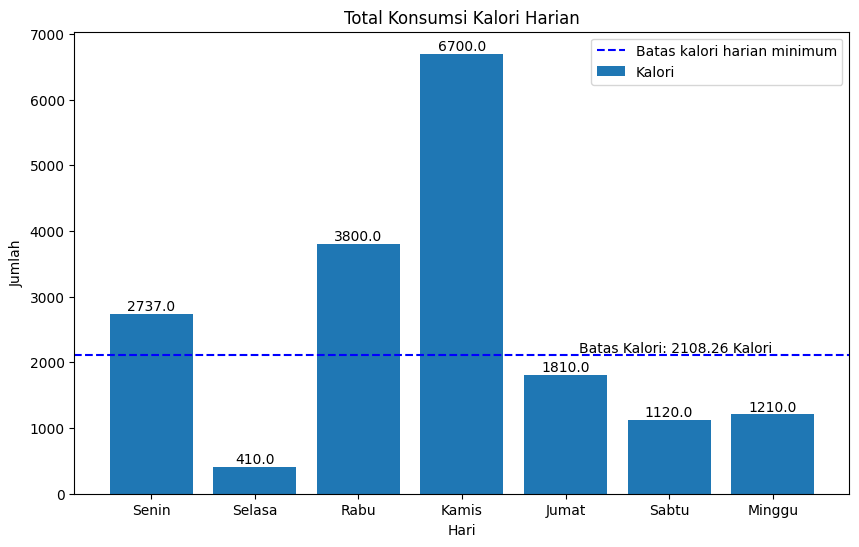

In [21]:
# Gabungkan data menjadi DataFrame
data_plot = pd.DataFrame({'Kalori': Kalori_Harian,
                          'Karbohidrat': Karbohidrat_Harian,
                          'Protein': Protein_Harian,
                          'Lemak': Lemak_Harian})

# Ubah DataFrame menjadi NumPy array
data_array = data_plot.to_numpy()

plt.figure(figsize=(10, 6))
# Buat grafik batang
plt.bar(Daily_grouped.index, Daily_grouped['Kalori'], label='Kalori')  # Mengambil kolom pertama (Kalori)
for i, v in enumerate(Daily_grouped['Kalori']):
    plt.text(i, v+50, str(v), ha='center')

plt.axhline(y=bmr, color='blue', linestyle='--', label='Batas kalori harian minimum')
plt.text(len(Daily_grouped.index)-1, bmr+50, f"Batas Kalori: {bmr} Kalori", ha='right')

plt.title('Total Konsumsi Kalori Harian')
plt.xlabel('Hari')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.legend()
plt.show()

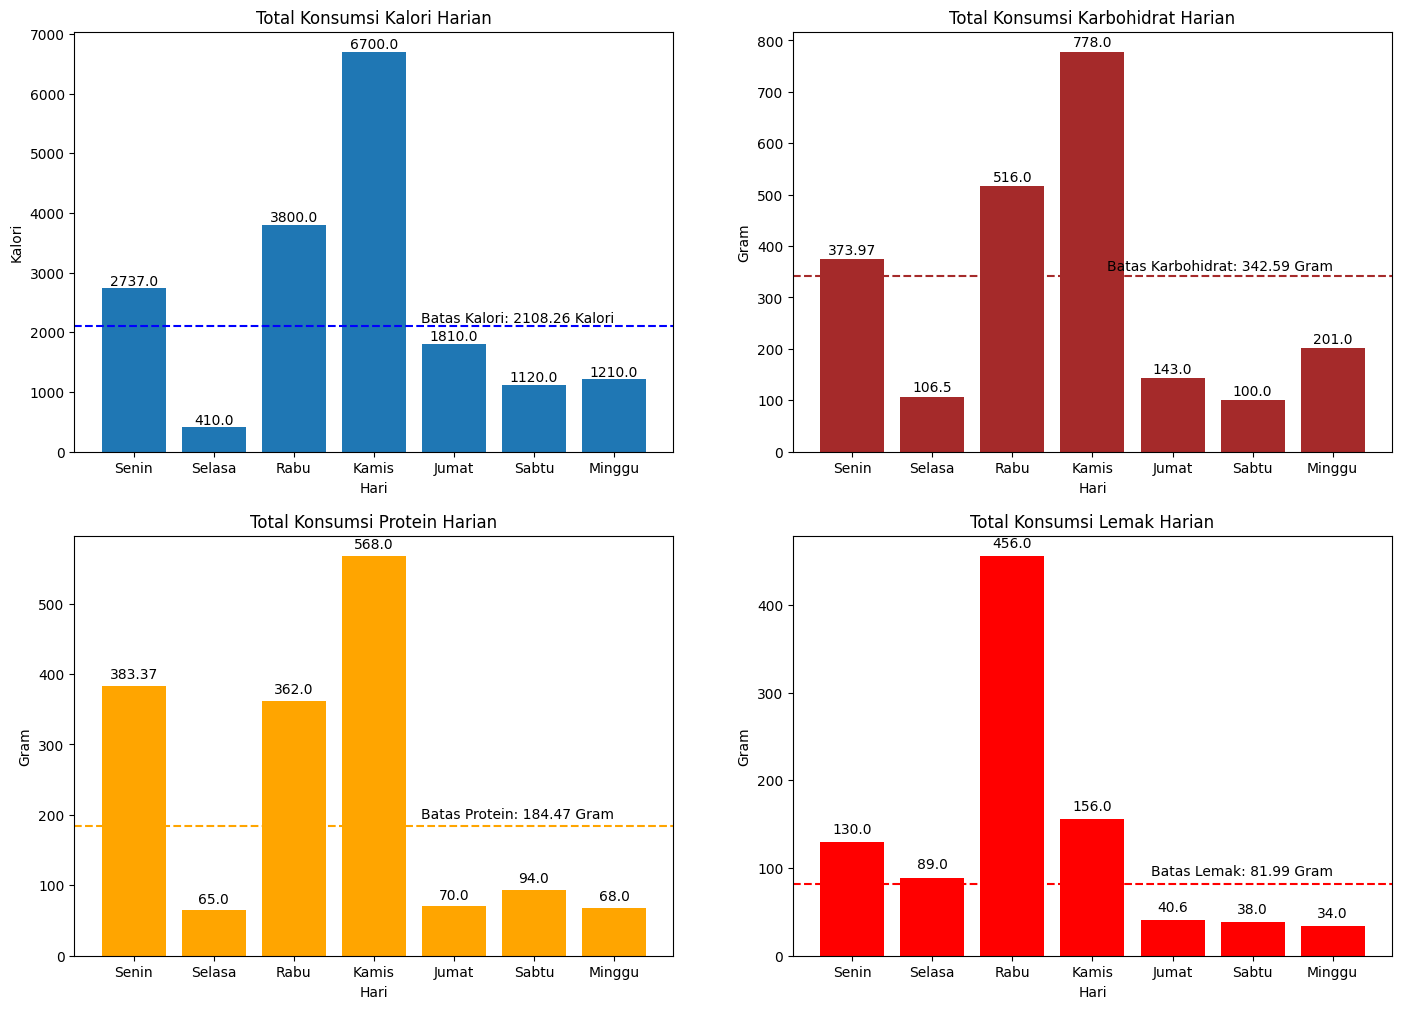

In [24]:
plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)  # 1 baris, 2 kolom, subplot ke-1

plt.bar(Daily_grouped.index, Daily_grouped['Kalori'], label='Kalori')

#menampilkan value pada diagram batang
for i, v in enumerate(Daily_grouped['Kalori']):
    plt.text(i, v+50, str(v), ha='center')

plt.axhline(y=bmr, color='Blue', linestyle='--', label='Batas kalori harian minimum')
#menampilkan value pada garis batas
plt.text(len(Daily_grouped.index)-1, bmr+50, f"Batas Kalori: {bmr} Kalori", ha='right')

plt.title('Total Konsumsi Kalori Harian')
plt.xlabel('Hari')
plt.ylabel('Kalori')
plt.xticks(rotation=0)
#plt.legend()

plt.subplot(2, 2, 2)  # 2 baris, 2 kolom, subplot ke-2

plt.bar(Daily_grouped.index, Daily_grouped['Karbohidrat'], label='Karbohidrat', color='brown')
for i, v in enumerate(Daily_grouped['Karbohidrat']):
    plt.text(i, v+10, str(v), ha='center')

plt.axhline(y=karb_min, color='brown', linestyle='--', label='Batas karbohidrat harian minimum')
plt.text(len(Daily_grouped.index)-1, karb_min+10, f"Batas Karbohidrat: {karb_min} Gram", ha='right')

plt.title('Total Konsumsi Karbohidrat Harian')
plt.xlabel('Hari')
plt.ylabel('Gram')
plt.xticks(rotation=0)
#plt.legend()


plt.subplot(2, 2, 3)  # 2 baris, 2 kolom, subplot ke-3

plt.bar(Daily_grouped.index, Daily_grouped['Protein'], label='Protein', color='Orange')
for i, v in enumerate(Daily_grouped['Protein']):
    plt.text(i, v+10, str(v), ha='center')

plt.axhline(y=prot_min, color='orange', linestyle='--', label='Batas protein harian minimum')
plt.text(len(Daily_grouped.index)-1, prot_min+10, f"Batas Protein: {prot_min} Gram", ha='right')

plt.title('Total Konsumsi Protein Harian')
plt.xlabel('Hari')
plt.ylabel('Gram')
plt.xticks(rotation=0)
#plt.legend()


plt.subplot(2, 2, 4)  # 2 baris, 2 kolom, subplot ke-4

plt.bar(Daily_grouped.index, Daily_grouped['Lemak'], label='Lemak', color='red')
for i, v in enumerate(Daily_grouped['Lemak']):
    plt.text(i, v+10, str(v), ha='center')

plt.axhline(y=lem_min, color='red', linestyle='--', label='Batas lemak harian minimum')
plt.text(len(Daily_grouped.index)-1, lem_min+10, f"Batas Lemak: {lem_min} Gram", ha='right')

plt.title('Total Konsumsi Lemak Harian')
plt.xlabel('Hari')
plt.ylabel('Gram')
plt.xticks(rotation=0)
#plt.legend()

plt.show()

Group By Berdasarkan Waktu Makan

In [25]:
grouped_waktu = Daily.groupby('Waktu Makan')

# Konversi ke DataFrame dan reset indeks
Time_grouped = grouped_waktu.sum().reset_index()
urutan_waktu = ['Sarapan', 'Makan Siang', 'Makan Malam']
Time_grouped = Time_grouped.set_index('Waktu Makan')
Time_grouped = Daily_grouped.reindex(urutan_waktu)

# Hitung jumlah kalori untuk setiap kategori waktu makan
mean_kalori_per_waktu = grouped_waktu['Kalori'].mean()
mean_karbo_per_waktu = grouped_waktu['Karbohidrat'].mean()
mean_protein_per_waktu = grouped_waktu['Protein'].mean()
mean_lemak_per_waktu = grouped_waktu['Lemak'].mean()

print(mean_kalori_per_waktu)

print(Time_grouped.index)



Waktu Makan
Makan Malam    597.25
Makan Siang    952.50
Sarapan        375.00
Name: Kalori, dtype: float64
Index(['Sarapan', 'Makan Siang', 'Makan Malam'], dtype='object', name='Hari')


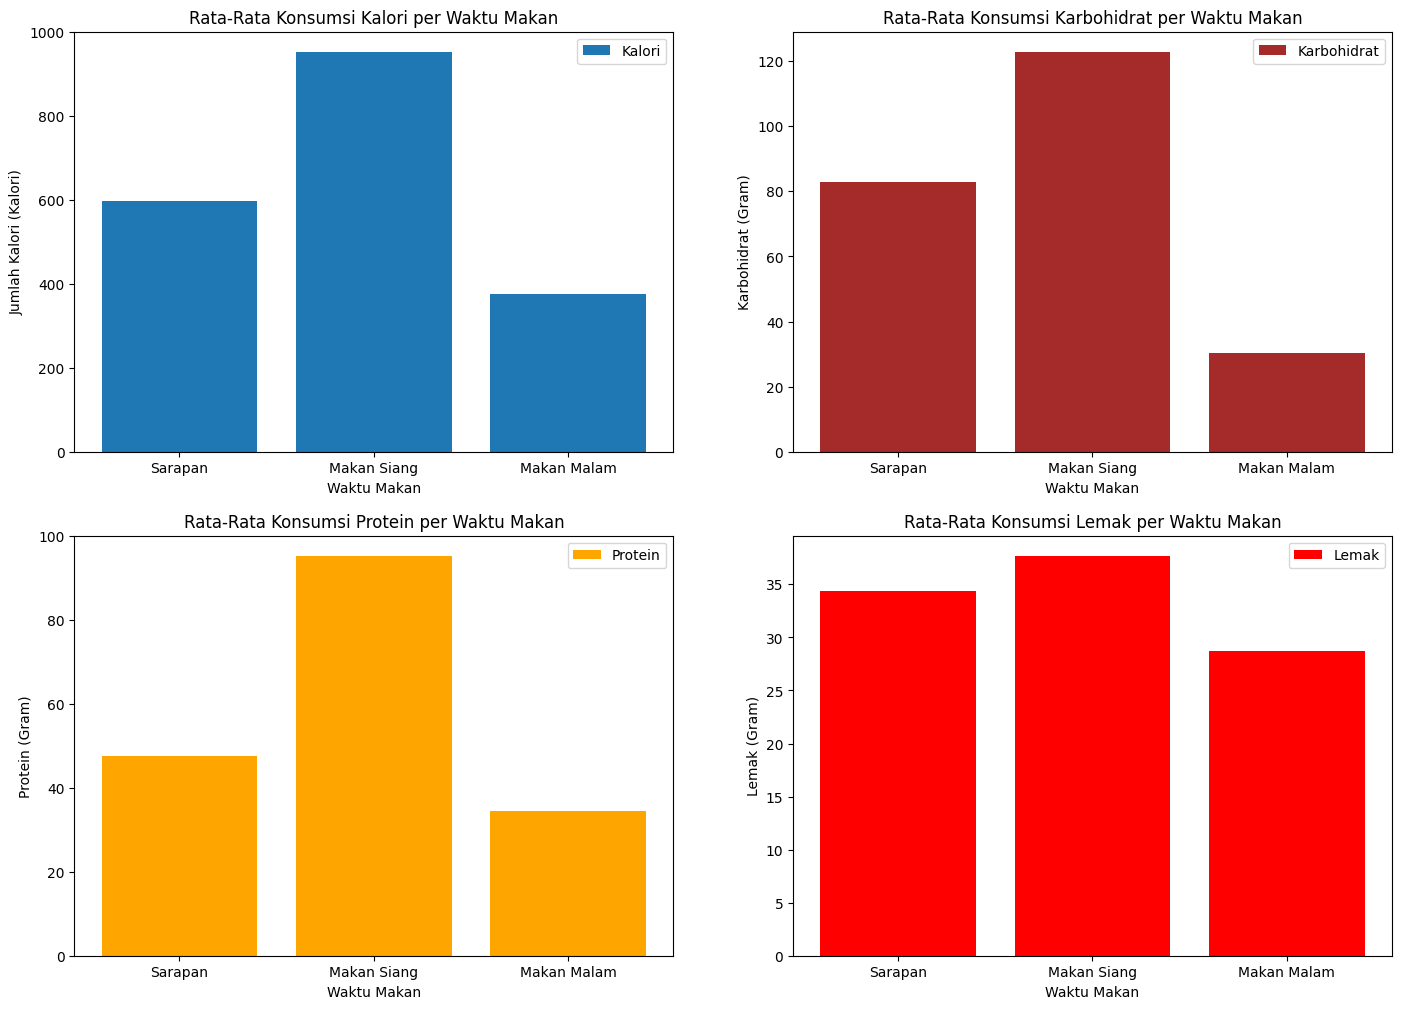

In [26]:
# Gabungkan data menjadi DataFrame
data_plot2 = pd.DataFrame({'Kalori': mean_kalori_per_waktu,
                          'Karbohidrat': mean_karbo_per_waktu,
                          'Protein': mean_protein_per_waktu,
                          'Lemak': mean_lemak_per_waktu})

# Ubah DataFrame menjadi NumPy array
data_array = data_plot2.to_numpy()

plt.figure(figsize=(17, 12))
# Buat grafik batang
plt.subplot(2, 2, 1)  # 2 baris, 2 kolom, subplot ke-1
plt.bar(Time_grouped.index, mean_kalori_per_waktu, label='Kalori')
plt.title('Rata-Rata Konsumsi Kalori per Waktu Makan')
plt.xlabel('Waktu Makan')
plt.ylabel('Jumlah Kalori (Kalori)')
plt.xticks(rotation=0)
plt.legend()

plt.subplot(2, 2, 2)  # 2 baris, 2 kolom, subplot ke-2
plt.bar(Time_grouped.index, mean_karbo_per_waktu, label='Karbohidrat', color='brown')
plt.title('Rata-Rata Konsumsi Karbohidrat per Waktu Makan')
plt.xlabel('Waktu Makan')
plt.ylabel('Karbohidrat (Gram)')
plt.xticks(rotation=0)
plt.legend()

plt.subplot(2, 2, 3)  # 2 baris, 2 kolom, subplot ke-3
plt.bar(Time_grouped.index, mean_protein_per_waktu, label='Protein', color='orange')
plt.title('Rata-Rata Konsumsi Protein per Waktu Makan')
plt.xlabel('Waktu Makan')
plt.ylabel('Protein (Gram)')
plt.xticks(rotation=0)
plt.legend()

plt.subplot(2, 2, 4)  # 2 baris, 2 kolom, subplot ke-4
plt.bar(Time_grouped.index, mean_lemak_per_waktu, label='Lemak', color='red')
plt.title('Rata-Rata Konsumsi Lemak per Waktu Makan')
plt.xlabel('Waktu Makan')
plt.ylabel('Lemak (Gram)')
plt.xticks(rotation=0)
plt.legend()

plt.show()

### Rekomendasi Makanan

In [27]:
jumlah_kalori_selasa = Daily_grouped.loc['Selasa', 'Kalori']
defisit_kalori = bmr - jumlah_kalori_selasa

print("kekurangan kalori hari ini", f"{defisit_kalori:.2f}", "kalori")


kekurangan kalori hari ini 1698.26 kalori


In [28]:
df.head()

,No,Nama_Makanan,Jenis_makanan,Size,Kalori,Lemak,Karbohidrat,Protein
0,1,Indomie goreng,Makanan,80.0,350.0,12.0,52.0,8.0
1,2,Pop Mie,Makanan,75.0,350.0,16.0,45.0,6.0
2,3,Chitato Lite,Snack,14.0,80.0,4.5,8.0,1.0
3,4,Bubur Ayam,Makanan,240.0,372.0,12.4,36.1,27.6
4,5,Nissin Crispy Crackers,Snack,30.0,150.0,6.0,21.0,2.0


Sorting berdasarkan kalori

In [29]:
#Makanan
df_makanan = df[df['Jenis_makanan']=='Makanan']

#minuman
df_minuman = df[df['Jenis_makanan']=='Minuman']

#Snack
df_snack = df[df['Jenis_makanan']=='Snack']

# Urutkan DataFrame berdasarkan kolom 'Kalori' secara descending
makanan_sorted = df_makanan.sort_values(by='Kalori', ascending=False)
minuman_sorted = df_minuman.sort_values(by='Kalori', ascending=False)
snack_sorted = df_snack.sort_values(by= 'Kalori', ascending=False)

# Ambil 5 baris teratas
top_5_makanan = makanan_sorted[['Nama_Makanan', 'Jenis_makanan','Kalori']].head(5)
top_5_minuman = minuman_sorted[['Nama_Makanan', 'Jenis_makanan','Kalori']].head(5)
top_5_snack = snack_sorted[['Nama_Makanan', 'Jenis_makanan','Kalori']].head(5)

# Ambil kolom 'Nama_Makanan' dari 5 baris teratas
#nama_makanan_teratas = top_5_makanan['Nama_Makanan']

print(top_5_makanan)
print("==============================================================")
print(top_5_minuman)
print("==============================================================")
print(top_5_snack)

        Nama_Makanan Jenis_makanan  Kalori
6         Kupat Tahu       Makanan   391.0
3         Bubur Ayam       Makanan   372.0
1            Pop Mie       Makanan   350.0
0     Indomie goreng       Makanan   350.0
31  Nasi Goreng Ayam       Makanan   247.0
    Nama_Makanan Jenis_makanan  Kalori
20    Ultra Milk       Minuman   160.0
21       Buavita       Minuman   120.0
22  Pocari Sweat       Minuman   120.0
33      Cocacola       Minuman   100.0
28     Teh Kotak       Minuman    70.0
     Nama_Makanan Jenis_makanan  Kalori
10           Oreo         Snack   560.0
16    Kacang Atom         Snack   533.0
34      Bala-Bala         Snack   228.0
35  Tempe Mendoan         Snack   200.0
9    Silver Queen         Snack   170.0


Sorting berdasarkan Protein

In [31]:
# Urutkan DataFrame berdasarkan kolom 'Protein' secara descending
makanan_sorted_protein = df_makanan.sort_values(by='Protein', ascending=False)
minuman_sorted_protein = df_minuman.sort_values(by='Protein', ascending=False)
snack_sorted_protein = df_snack.sort_values(by= 'Protein', ascending=False)

# Ambil 5 baris teratas
top_5_makanan_protein = makanan_sorted_protein[['Nama_Makanan', 'Jenis_makanan','Protein']].head(5)
top_5_minuman_protein = minuman_sorted_protein[['Nama_Makanan', 'Jenis_makanan','Protein']].head(5)
top_5_snack_protein = snack_sorted_protein[['Nama_Makanan', 'Jenis_makanan','Protein']].head(5)

# Ambil kolom 'Nama_Makanan' dari 5 baris teratas
#nama_makanan_teratas = top_5_makanan['Nama_Makanan']

print(top_5_makanan_protein)
print("==============================================================")
print(top_5_minuman_protein)
print("==============================================================")
print(top_5_snack_protein)

        Nama_Makanan Jenis_makanan  Protein
3         Bubur Ayam       Makanan    27.60
6         Kupat Tahu       Makanan    11.30
31  Nasi Goreng Ayam       Makanan     9.37
0     Indomie goreng       Makanan     8.00
1            Pop Mie       Makanan     6.00
    Nama_Makanan Jenis_makanan  Protein
20    Ultra Milk       Minuman      6.0
21       Buavita       Minuman      0.0
22  Pocari Sweat       Minuman      0.0
28     Teh Kotak       Minuman      0.0
33      Cocacola       Minuman      0.0
     Nama_Makanan Jenis_makanan  Protein
16    Kacang Atom         Snack    27.80
35  Tempe Mendoan         Snack    11.18
32        Risoles         Snack    10.54
14  Singles Sosis         Snack    10.00
15    Single Baso         Snack     8.00


In [33]:
jumlah_kalori_hari_n = Daily_grouped.loc['Jumat', 'Kalori']
defisit_kalori = bmr - jumlah_kalori_hari_n

print("kekurangan kalori hari Jumat", f"{defisit_kalori:.2f}", "kalori")
print("==============================================================")

r1 = makanan_sorted[makanan_sorted['Kalori'] <= defisit_kalori]
r2 = minuman_sorted[minuman_sorted['Kalori'] <= defisit_kalori]
r3 = snack_sorted[snack_sorted['Kalori'] <= defisit_kalori]

rekomendasi_makanan = r1[['Nama_Makanan', 'Jenis_makanan','Kalori']].head(3)
rekomendasi_minuman = r2[['Nama_Makanan', 'Jenis_makanan','Kalori']].head(3)
rekomendasi_snack = r3[['Nama_Makanan', 'Jenis_makanan','Kalori']].head(3)

print(rekomendasi_makanan)
print("==============================================================")
print(rekomendasi_minuman)
print("==============================================================")
print(rekomendasi_snack)


kekurangan kalori hari Jumat 298.26 kalori
        Nama_Makanan Jenis_makanan  Kalori
31  Nasi Goreng Ayam       Makanan   247.0
18       Koko Krunch       Makanan   110.0
    Nama_Makanan Jenis_makanan  Kalori
20    Ultra Milk       Minuman   160.0
21       Buavita       Minuman   120.0
22  Pocari Sweat       Minuman   120.0
     Nama_Makanan Jenis_makanan  Kalori
34      Bala-Bala         Snack   228.0
35  Tempe Mendoan         Snack   200.0
9    Silver Queen         Snack   170.0
